# Mice Protein Performance

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectFromModel

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
df = pd.read_csv("Data_Cortex_Nuclear.csv")

In [4]:
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

In [5]:
df.tail()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[5 rows x 82 columns]

In [6]:
df.describe() #numerical data

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

In [7]:
df[['MouseID','Genotype', 'Treatment', 'Behavior']].describe()

MouseID Genotype  Treatment Behavior
count     1080     1080       1080     1080
unique    1080        2          2        2
top      309_1  Control  Memantine      S/C
freq         1      570        570      555

In [8]:
df.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [9]:
df.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [10]:
print(f'Dataset have {df.shape[0]} rows and {df.shape[1]} columns')

Dataset have 1080 rows and 82 columns


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [12]:
df['class'].value_counts()

class
c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: count, dtype: int64

In [13]:
df.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [14]:
round(df.isnull().sum() * 100 / df.shape[0],2).sort_values()

MouseID       0.00
P70S6_N       0.00
pGSK3B_N      0.00
pPKCG_N       0.00
CDK5_N        0.00
             ...  
H3AcK18_N    16.67
EGR1_N       19.44
BAD_N        19.72
H3MeK4_N     25.00
BCL2_N       26.39
Length: 82, dtype: float64

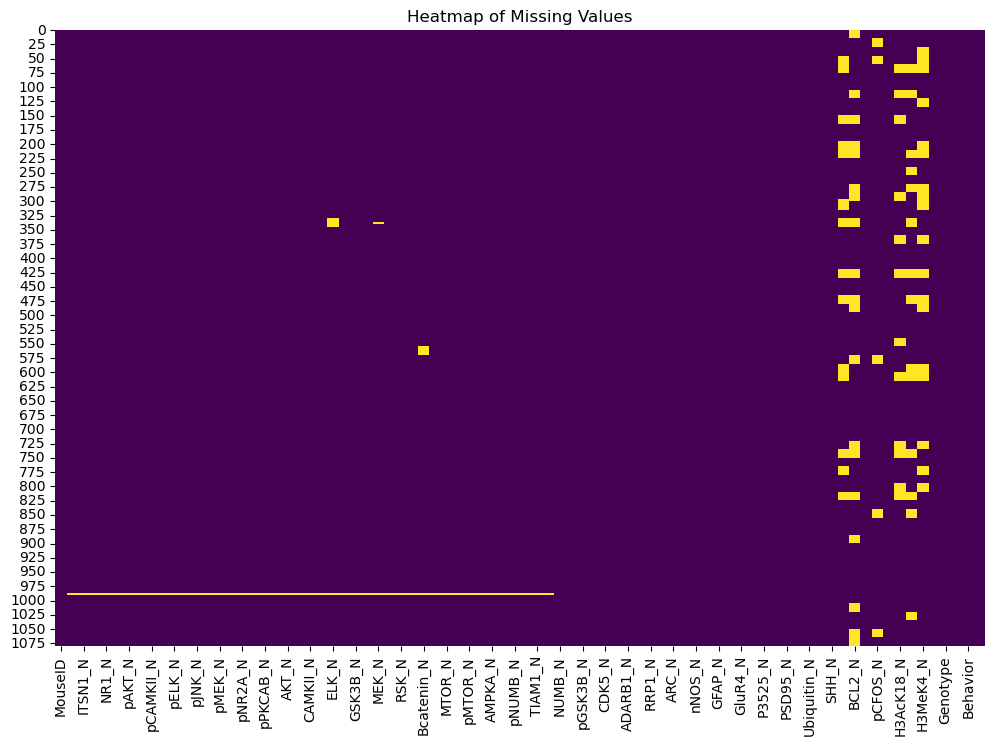

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


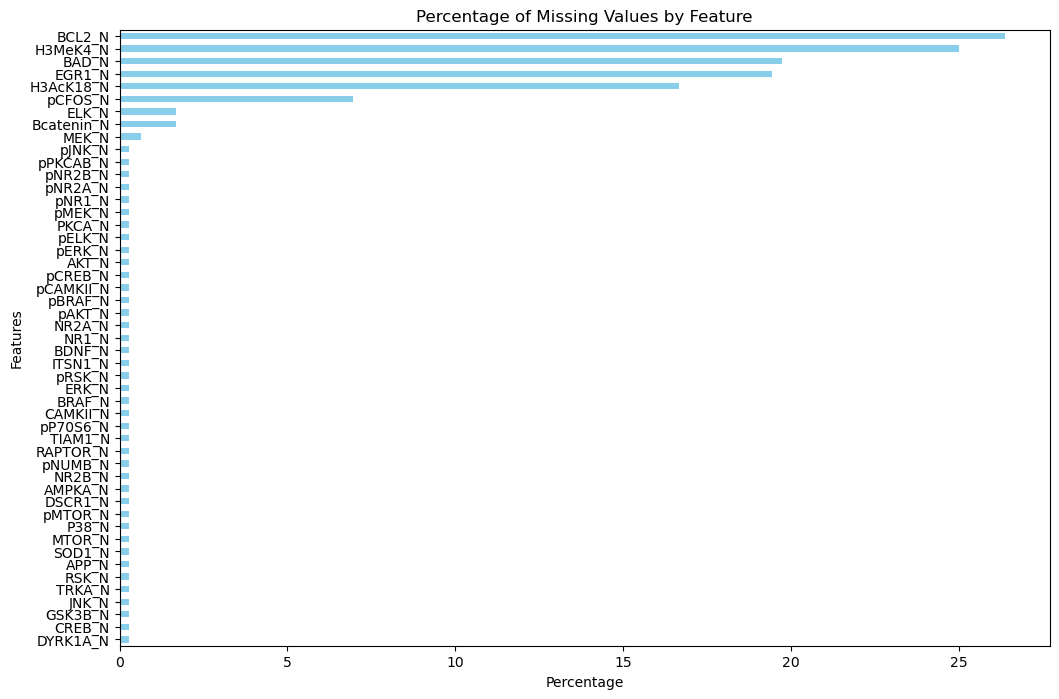

In [17]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort by percentage of missing values
missing_percentage = missing_percentage.sort_values()

# Plot
plt.figure(figsize=(12, 8))
missing_percentage.plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Percentage')
plt.ylabel('Features')
plt.show()


In [18]:
df.dropna(inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [21]:
df['Genotype'] = label_encoder.fit_transform(df['Genotype'])
df['Treatment'] = label_encoder.fit_transform(df['Treatment'])
df['Behavior'] = label_encoder.fit_transform(df['Behavior'])
df['class'] = label_encoder.fit_transform(df['class'])


In [22]:
df.tail()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
1045  3525_11  0.382149  0.595792  0.399101  2.527574  4.629493  0.317810   
1046  3525_12  0.387947  0.586510  0.431650  2.527041  4.781082  0.316903   
1047  3525_13  0.343695  0.562547  0.361243  2.412885  3.949361  0.330158   
1048  3525_14  0.346594  0.551467  0.390353  2.445052  4.236201  0.343610   
1049  3525_15  0.365907  0.552861  0.386275  2.473812  4.347236  0.353783   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
1045  0.213235   6.219567  0.232639  ...  0.122308  0.507017   0.172393   
1046  0.222111   6.307723  0.239074  ...  0.121216  0.492432   0.177319   
1047  0.225620   6.060165  0.254951  ...  0.121936  0.490258   0.169076   
1048  0.229239   6.023371  0.240676  ...  0.136900  0.502282   0.180016   
1049  0.232784   6.085354  0.242726  ...  0.130069  0.487991   0.194635   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  class  
1045  0.200097  0.221994  1.141423         1          1         1      7  
1046  0.207593  0.235223  1.104757         1          1         1      7  
1047  0.182590  0.243715  1.104494         1          1         1      7  
1048  0.199685  0.269866  1.136585         1          1         1      7  
1049  0.220056  0.242514  1.085621         1          1         1      7  

[5 rows x 82 columns]

In [23]:

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [25]:
numerical_cols = numerical_cols.drop('class', errors='ignore')
categorical_cols = categorical_cols.drop(['MouseID', 'class'], errors='ignore')

In [26]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [28]:
X = df.drop(columns=['MouseID', 'class'])  # Features
y = df['class']

In [29]:
X_processed = preprocessor.fit_transform(X)

In [30]:
numerical_feature_names = numerical_cols.tolist()

In [31]:

categorical_transformer.fit(X[categorical_cols])
categorical_feature_names = categorical_transformer.get_feature_names_out(categorical_cols).tolist()

In [32]:
feature_names = numerical_feature_names + categorical_feature_names

In [33]:
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

X_processed_df.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  1.436707  1.126128  1.705383  1.703232  1.499958 -0.450542  0.047550   
1  1.232724  1.198861  1.381104  1.543155  1.528343 -0.028033 -0.303284   
2  1.361014  1.258610  1.605906  1.830294  1.698169 -0.408545 -0.085447   
3  0.989748  0.724574  0.625917  0.896770  1.022459 -0.483850 -0.560389   
4  0.779828  0.738418  0.657906  0.922900  1.031234 -0.363433 -0.384122   

   pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N     pS6_N  \
0   0.077228  0.862572  0.761816  ...  0.415723 -0.575896 -0.681628  0.837643   
1   0.019442  0.354457  0.502343  ...  0.743454 -0.777233 -0.311244  1.331291   
2   0.139804  0.389816  0.954070  ...  0.705498 -0.450800  0.058025  1.035111   
3   0.113739 -0.393751  0.349682  ...  0.185162 -0.782991 -0.920783 -0.079539   
4   0.181366 -0.389730  0.416548  ...  0.582337 -0.793646 -0.684829  0.600539   

    pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
0 -0.022167  0.591953  -0.598618 -0.883796 -1.109349  0.764351  
1  0.653422  0.324221  -0.804406 -0.484846 -1.060919  0.564395  
2  0.879360  0.249394  -0.744553 -0.499891 -1.123373  0.594418  
3 -0.419656  0.482464  -0.972203 -0.957253 -1.149702  0.824032  
4  0.630430 -0.089468  -0.841942 -0.637644 -1.045776  0.704288  

[5 rows x 77 columns]

In [34]:

non_numeric_cols = df.select_dtypes(exclude=['number']).columns

for col in df.columns:
    if col not in non_numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)

for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

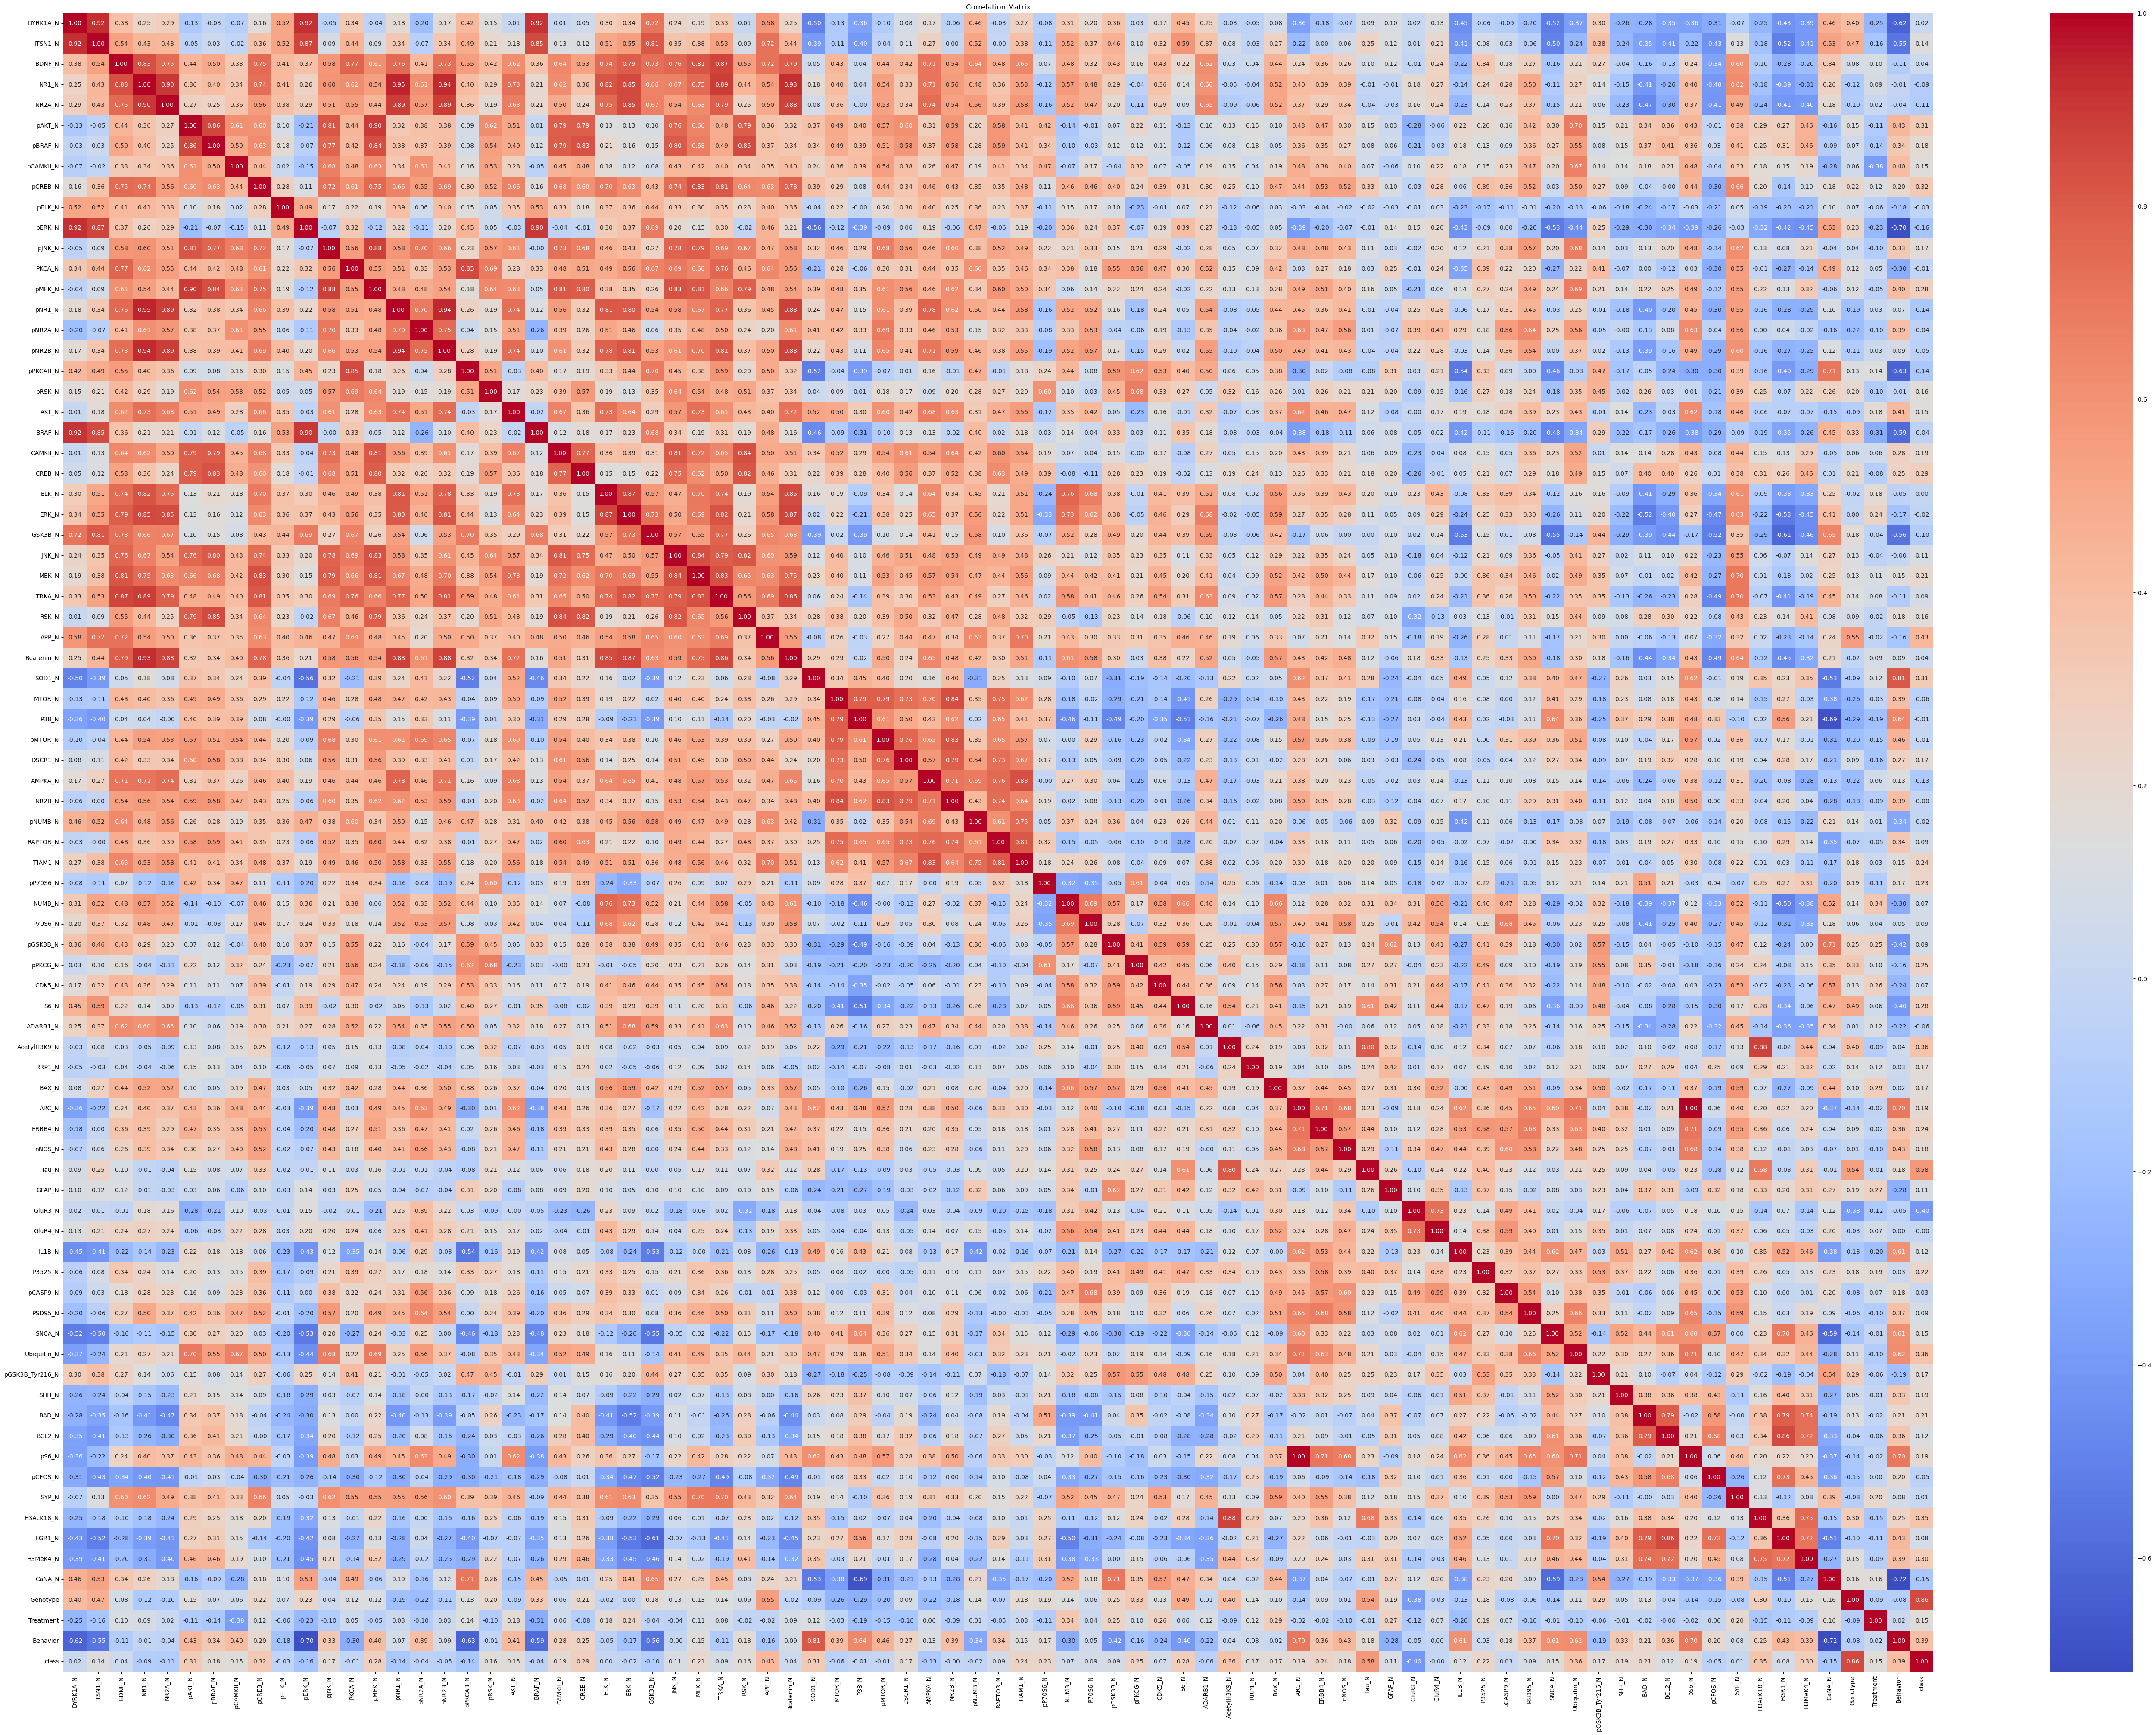

In [35]:

non_numeric_cols = df.select_dtypes(exclude=['number']).columns


df_numeric = df.drop(non_numeric_cols, axis=1)


corr_matrix = df_numeric.corr()

plt.figure(figsize=(70, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

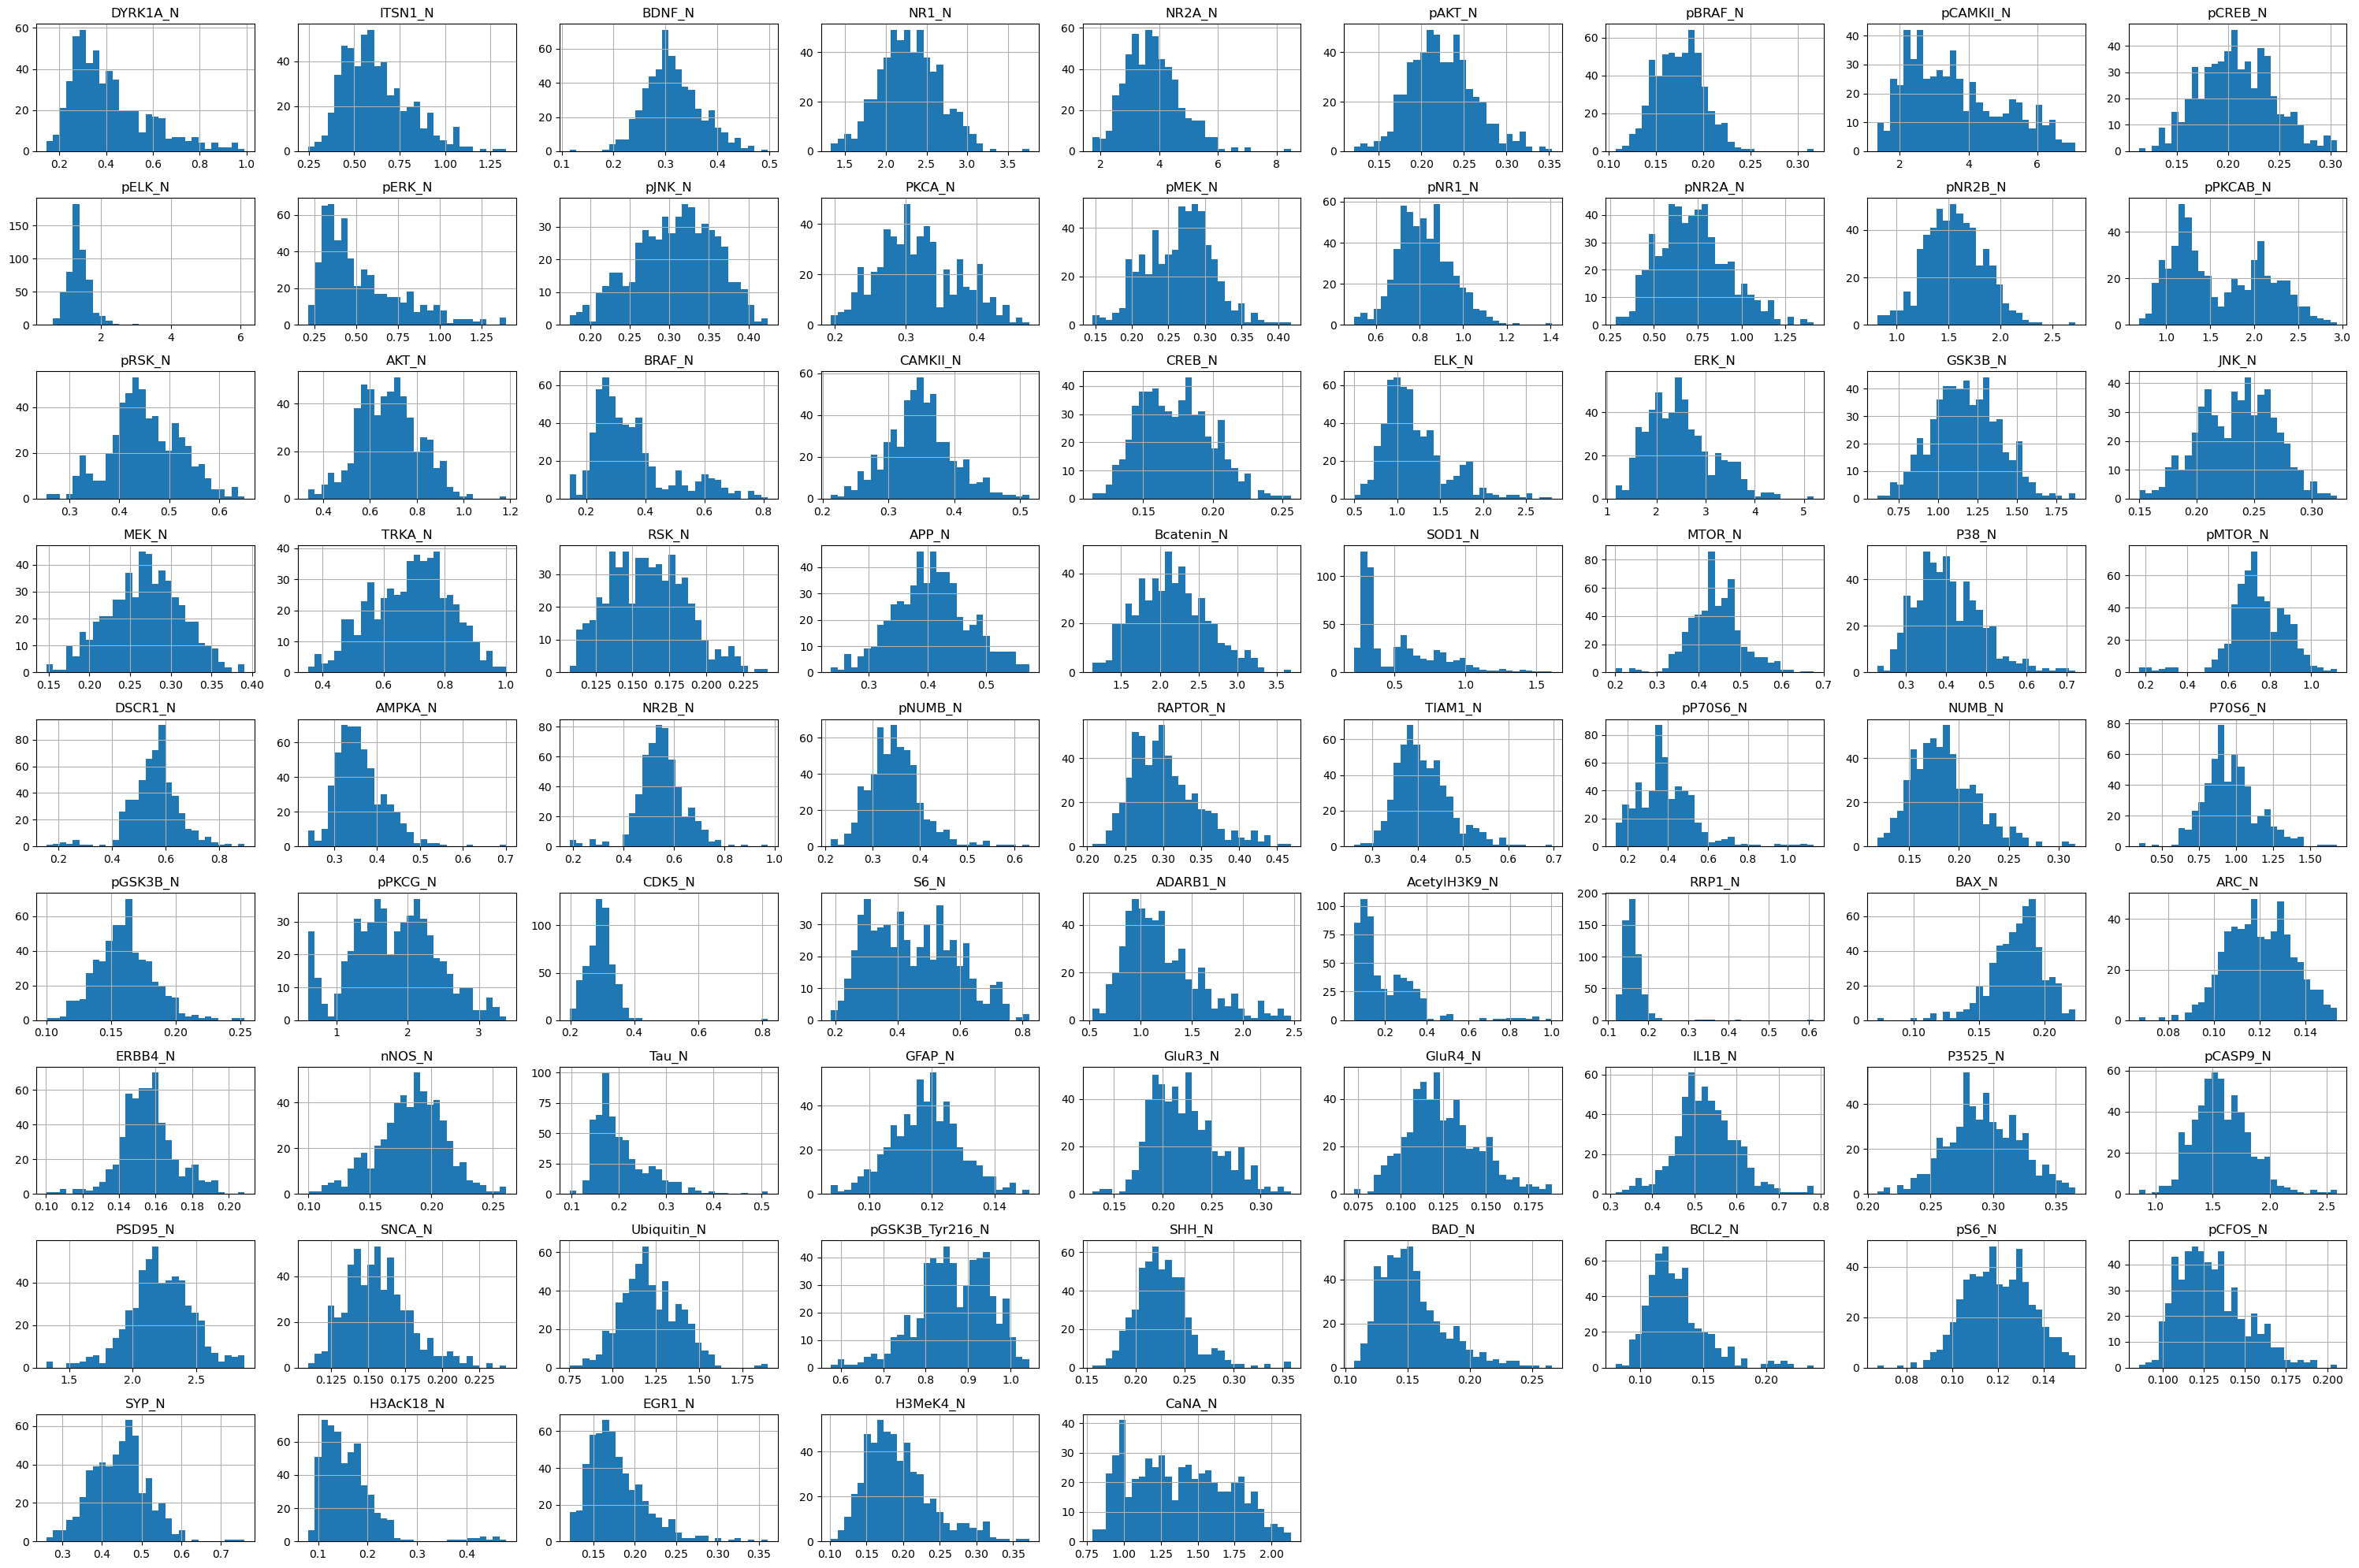

In [36]:
df[numerical_cols].hist(figsize=(30, 20), bins=30)
plt.tight_layout()
plt.show()

<Figure size 3000x2000 with 0 Axes>

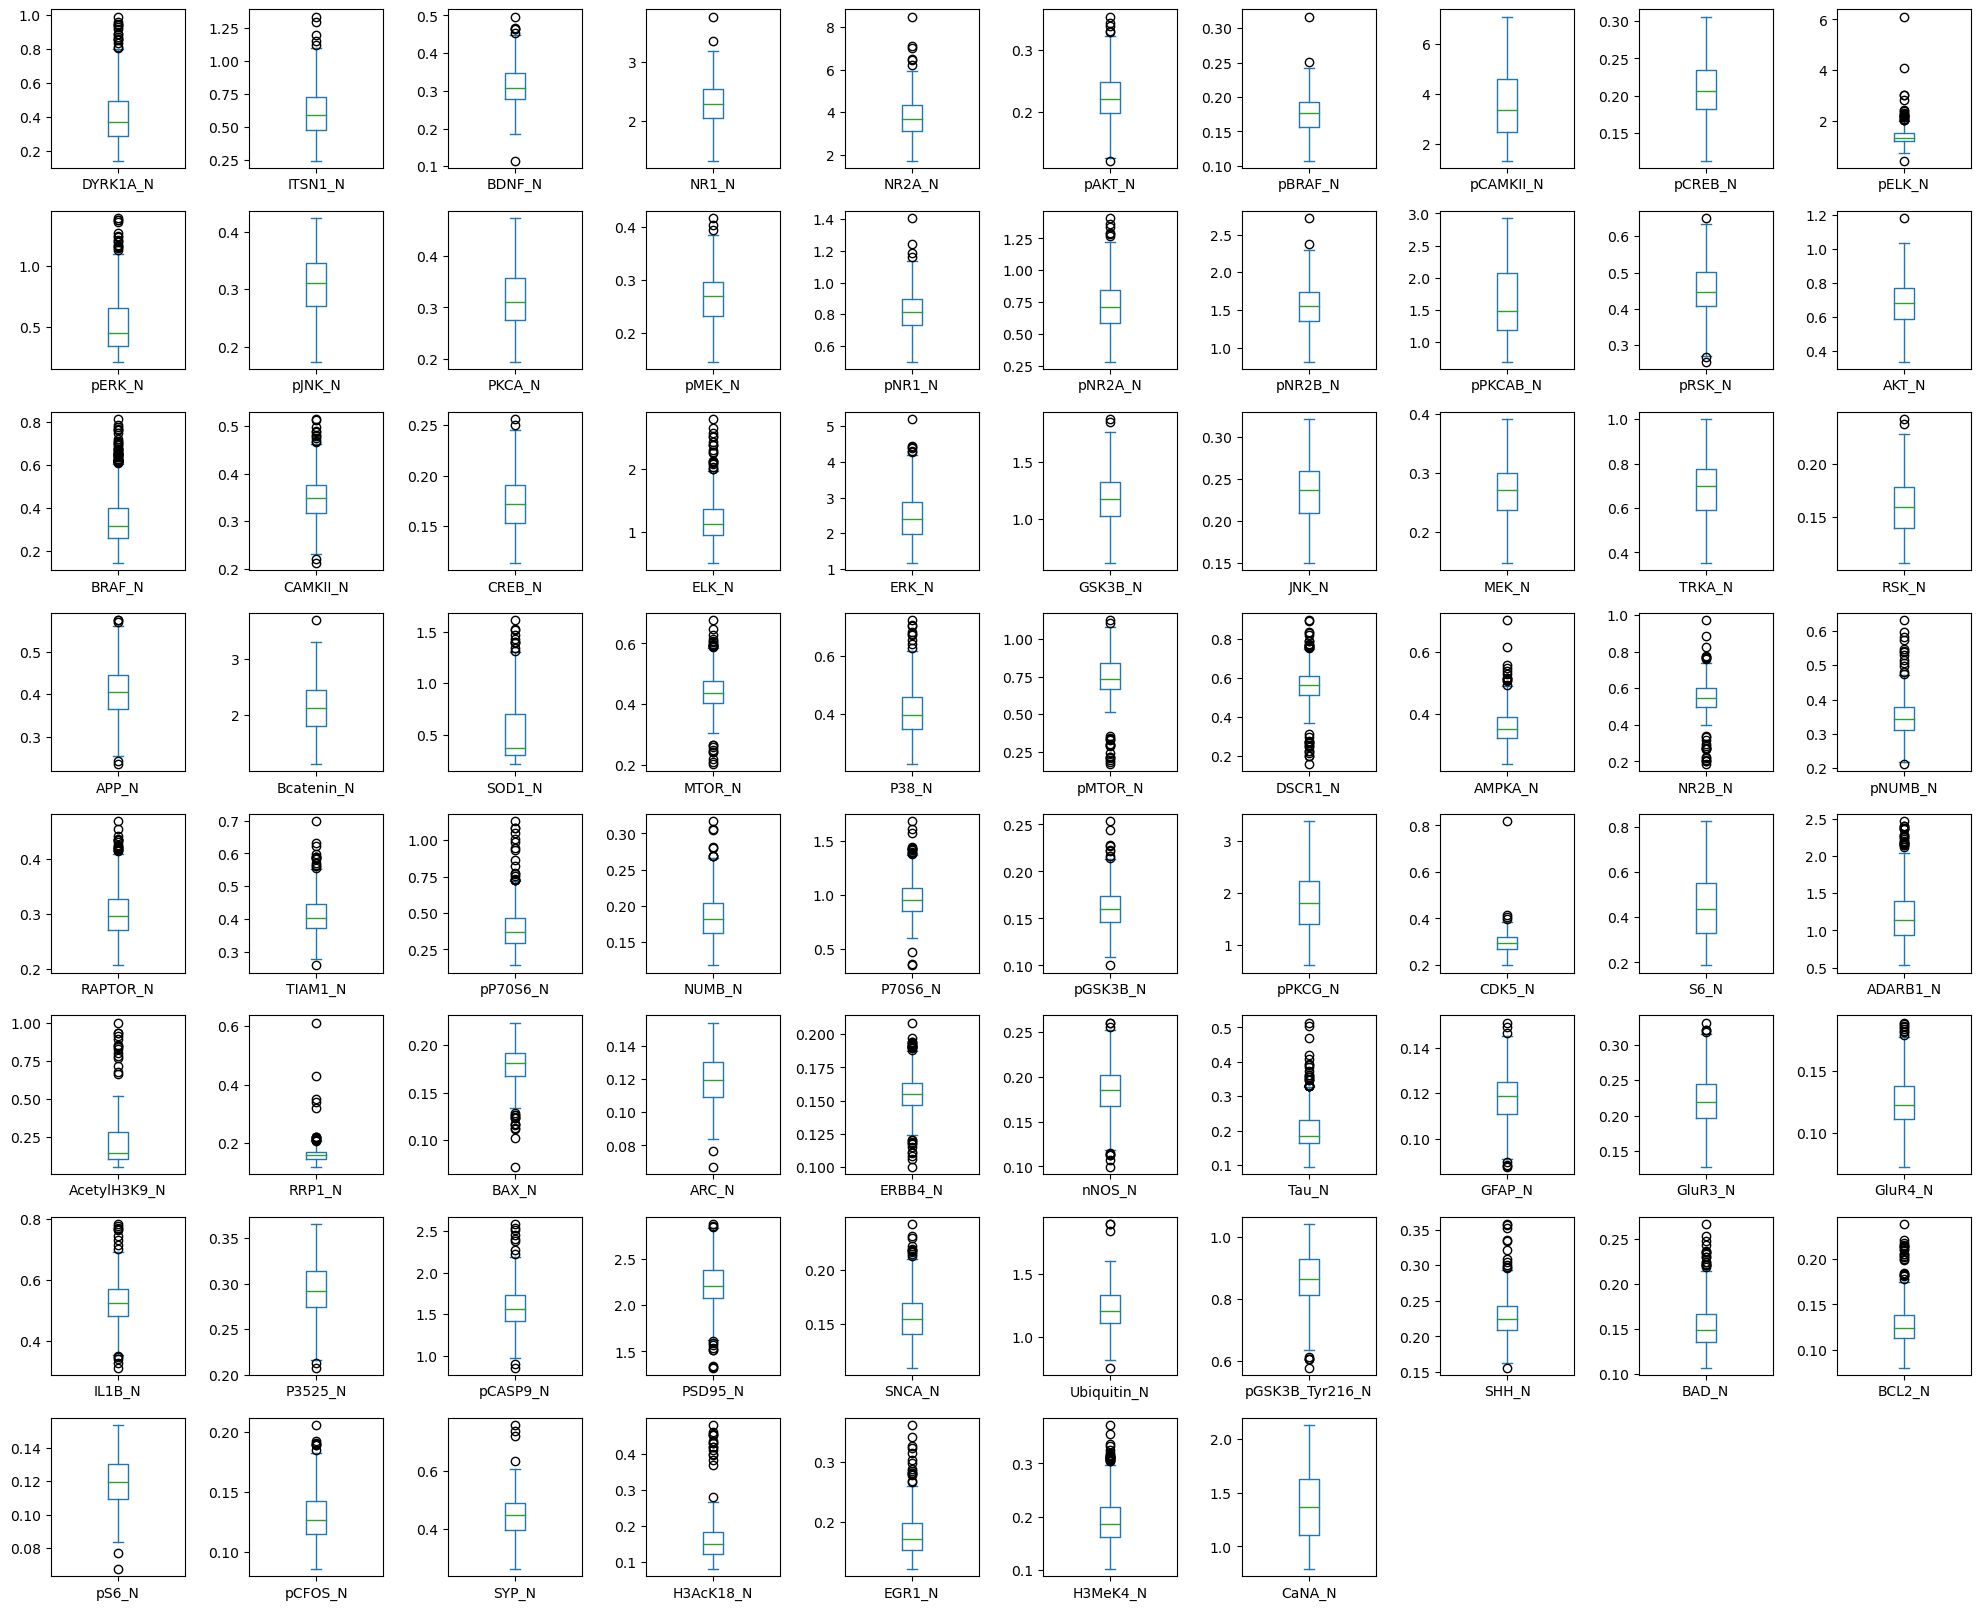

In [37]:
plt.figure(figsize=(30, 20))
df[numerical_cols].plot(kind='box', subplots=True, layout=(10, 10), sharex=False, sharey=False, figsize=(20, 20))
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


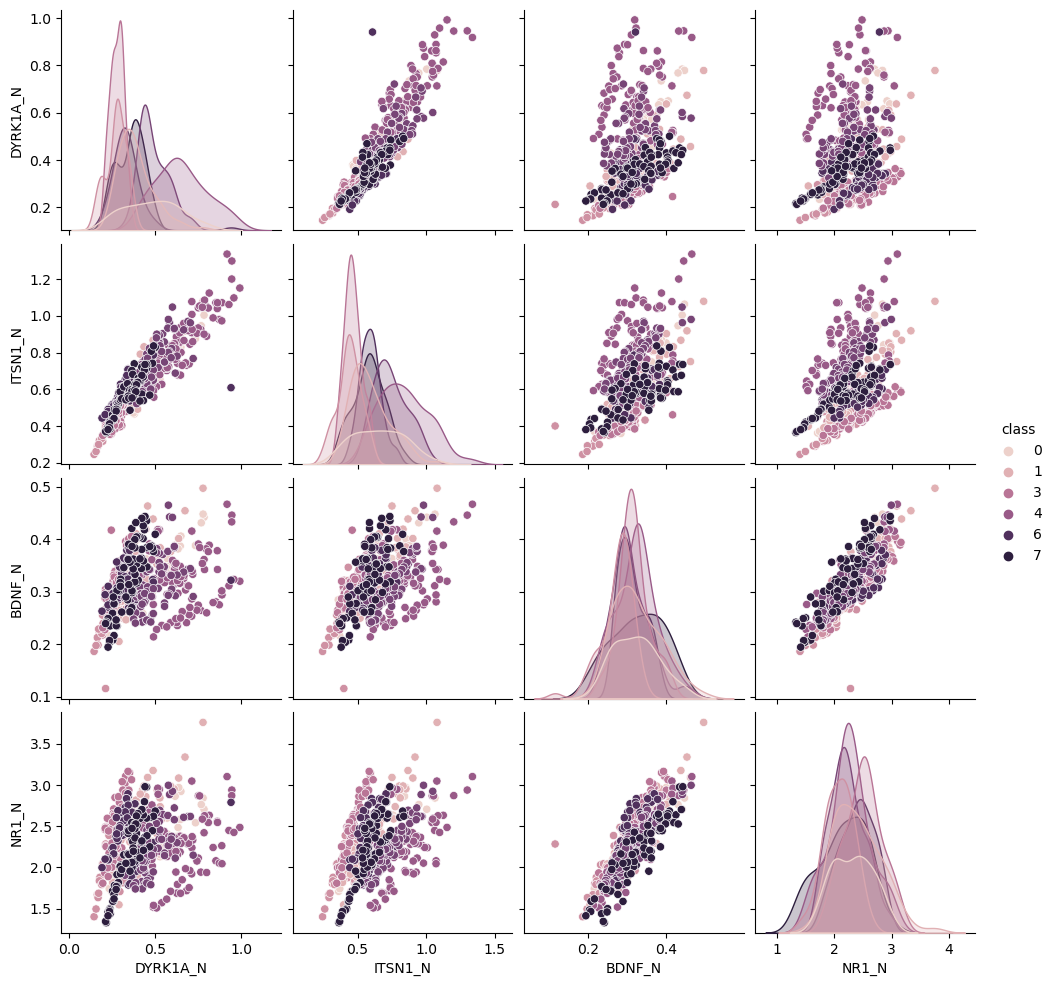

In [38]:
sns.pairplot(df[['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'class']], hue='class')
plt.show()

In [39]:
X = df.drop(columns=['MouseID', 'class'])
y = df['class']

In [40]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [41]:
correlation_threshold = 0.9
corr_matrix = pd.DataFrame(X_processed).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
X_reduced = X_processed[:, ~np.isin(range(X_processed.shape[1]), to_drop)]


In [42]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_reduced, y)
selector = SelectFromModel(clf, prefit=True)
X_selected = selector.transform(X_reduced)

In [43]:

feature_importances = clf.feature_importances_
selected_features = np.arange(X_reduced.shape[1])[selector.get_support()]

In [44]:

feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances[selected_features]
}).sort_values(by='Importance', ascending=False)


In [45]:
print("\nSelected Features (Top 20):")
feature_importance_df.head(20)


Selected Features (Top 20):


Feature  Importance
6        26    0.058648
0         0    0.047777
10       40    0.045331
7        28    0.035923
14       50    0.035853
4        15    0.034276
1         6    0.032656
21       69    0.031790
12       44    0.026572
13       47    0.026314
5        25    0.024611
11       42    0.023884
3        13    0.022972
9        39    0.018092
18       60    0.018064
17       59    0.017866
16       58    0.016960
15       52    0.016652
8        36    0.016577
20       66    0.015388

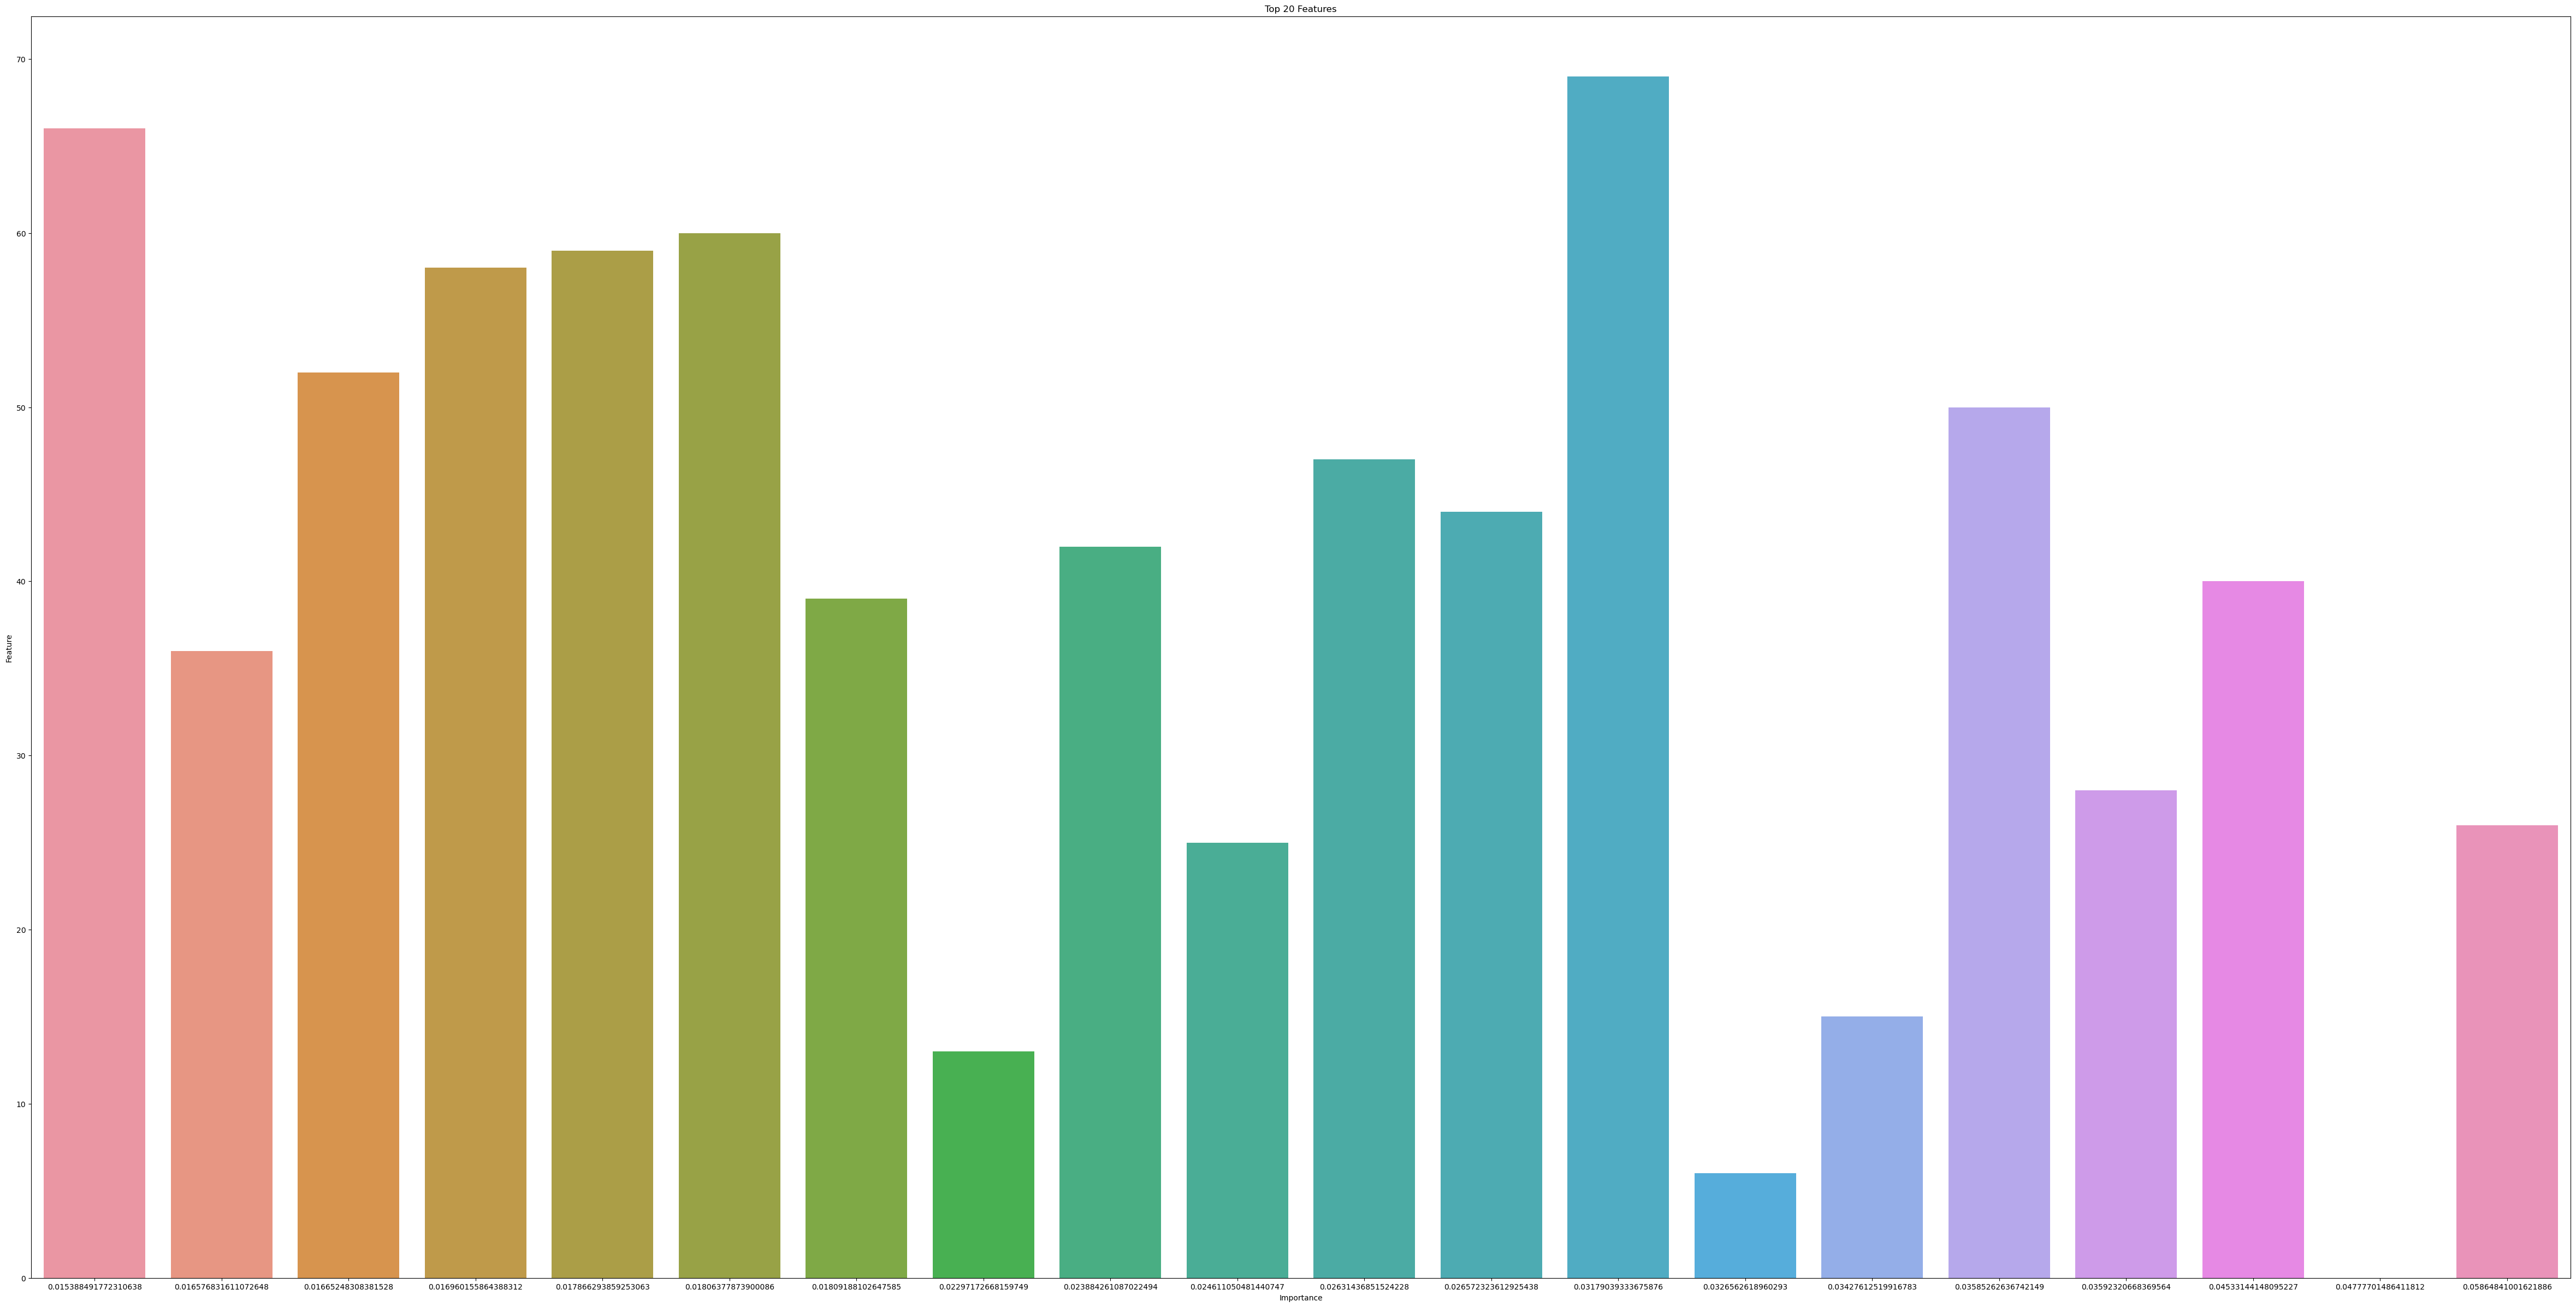

In [46]:
plt.figure(figsize=(60, 30))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Features')
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [48]:
rf_model= RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_rf = rf_model.predict(X_train)
y_test_rf = rf_model.predict(X_test)

train_acc_rf = accuracy_score(y_train, y_train_rf)
test_acc_rf = accuracy_score(y_test, y_test_rf)
                             
print("Training Accuracy:", train_acc_rf)
print("Testing Accuracy:", test_acc_rf)  

accuracy_rf = accuracy_score(y_test, y_test_rf)
print("Accuracy of Random Forest:", (accuracy_rf * 100))

print("Classification Report:")
print(classification_report(y_test, y_test_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_rf))

Training Accuracy: 1.0
Testing Accuracy: 0.990990990990991
Accuracy of Random Forest: 99.09909909909909
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        16
           7       0.94      1.00      0.97        17

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111

Confusion Matrix:
[[10  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  1]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  

In [49]:
lg_model = LogisticRegression(max_iter=100)
lg_model.fit(X_train, y_train)

y_train_lg = lg_model.predict(X_train)
y_test_lg = lg_model.predict(X_test)

train_acc_lg = accuracy_score(y_train, y_train_lg)
test_acc_lg = accuracy_score(y_test, y_test_lg)

print("Training Accuracy:", train_acc_lg)
print("Testing Accuracy:", test_acc_lg)

accuracy_lg = accuracy_score(y_test, y_test_lg)
print("Accuracy of Logistic Regression:", (accuracy_lg * 100))

print("Classification Report:")
print(classification_report(y_test, y_test_lg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_lg))

Training Accuracy: 1.0
Testing Accuracy: 1.0
Accuracy of Logistic Regression: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        17

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

Confusion Matrix:
[[10  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0 17]]


In [50]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

y_train_dt = dt_model.predict(X_train)
y_test_dt = dt_model.predict(X_test)

train_acc_dt = accuracy_score(y_train, y_train_dt)
test_acc_dt = accuracy_score(y_test, y_test_dt)

print("Training Accuracy:", train_acc_dt)
print("Testing Accuracy:", test_acc_dt)

accuracy_dt = accuracy_score(y_test, y_test_dt)
print("Accuracy of Decision Tree:", (accuracy_dt * 100))

print("Classification Report:")
print(classification_report(y_test, y_test_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_dt))

Training Accuracy: 0.9047619047619048
Testing Accuracy: 0.8198198198198198
Accuracy of Decision Tree: 81.98198198198197
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.79      0.73      0.76        15
           2       0.77      0.85      0.81        20
           3       0.83      1.00      0.91        10
           4       0.75      0.80      0.77        15
           5       0.73      1.00      0.84         8
           6       1.00      0.69      0.81        16
           7       1.00      0.94      0.97        17

    accuracy                           0.82       111
   macro avg       0.82      0.83      0.81       111
weighted avg       0.83      0.82      0.82       111

Confusion Matrix:
[[ 6  0  0  0  4  0  0  0]
 [ 2 11  0  0  0  2  0  0]
 [ 1  0 17  2  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  3  0  0 12  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  5  0  0  0 11  0]

In [51]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


y_train_svm = svm_model.predict(X_train)
y_test_svm = svm_model.predict(X_test)


train_acc_svm = accuracy_score(y_train, y_train_svm)
test_acc_svm = accuracy_score(y_test, y_test_svm)


print("Training Accuracy:", train_acc_svm)
print("Testing Accuracy:", test_acc_svm)


accuracy_svm = accuracy_score(y_test, y_test_svm)
print("Accuracy of SVM:", accuracy_svm * 100)

print("Classification Report:")
print(classification_report(y_test, y_test_svm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_svm))

Training Accuracy: 1.0
Testing Accuracy: 1.0
Accuracy of SVM: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        17

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

Confusion Matrix:
[[10  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0 17]]


In [52]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


y_train_knn = knn_model.predict(X_train)
y_test_knn = knn_model.predict(X_test)


train_acc_knn = accuracy_score(y_train, y_train_knn)
test_acc_knn = accuracy_score(y_test, y_test_knn)


print("Training Accuracy:", train_acc_knn)
print("Testing Accuracy:", test_acc_knn)


accuracy_knn = accuracy_score(y_test, y_test_knn)
print("Accuracy of k-NN:", accuracy_knn * 100)

print("Classification Report:")
print(classification_report(y_test, y_test_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_knn))

Training Accuracy: 1.0
Testing Accuracy: 0.972972972972973
Accuracy of k-NN: 97.2972972972973
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.87      0.93        15
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        15
           5       0.80      1.00      0.89         8
           6       0.94      1.00      0.97        16
           7       1.00      1.00      1.00        17

    accuracy                           0.97       111
   macro avg       0.97      0.98      0.97       111
weighted avg       0.98      0.97      0.97       111

Confusion Matrix:
[[10  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  2  0  0]
 [ 0  0 19  0  0  0  1  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0 17